In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import seaborn as sns

In [2]:
data=pd.read_csv('ML_Data_48.csv')

In [3]:
#data=data.drop(['Z_jerk_mean', 'X_jerk_mean', 'total_jerk_mean', 'Y_jerk_mean','X_jerk_mean','X_jerk_min', 'X_min', 'timestamp_range', 'Y_mean', 'X_mean', 'X_max','Z_mean', 'X_jerk_max', 'X_jerk_range', 'X_range'], axis=1)

In [4]:
data.columns

Index(['label', 'X_min', 'X_max', 'X_range', 'X_mean', 'X_rms', 'X_std',
       'Y_min', 'Y_max', 'Y_range', 'Y_mean', 'Y_rms', 'Y_std', 'Z_min',
       'Z_max', 'Z_range', 'Z_mean', 'Z_rms', 'Z_std', 'X_jerk_min',
       'X_jerk_max', 'X_jerk_range', 'X_jerk_mean', 'X_jerk_rms', 'X_jerk_std',
       'Y_jerk_min', 'Y_jerk_max', 'Y_jerk_range', 'Y_jerk_mean', 'Y_jerk_rms',
       'Y_jerk_std', 'Z_jerk_min', 'Z_jerk_max', 'Z_jerk_range', 'Z_jerk_mean',
       'Z_jerk_rms', 'Z_jerk_std', 'total_jerk_min', 'total_jerk_max',
       'total_jerk_range', 'total_jerk_mean', 'total_jerk_rms',
       'total_jerk_std', 'timestamp_range', 'SMA', 'X_entropy', 'Y_entropy',
       'Z_entropy'],
      dtype='object')

In [5]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

In [6]:
x=data.drop(['label'], axis=1)
y=data['label']

In [7]:
scale=StandardScaler()
x=scale.fit_transform(x)

In [8]:
x_train, x_t, y_train, y_t= train_test_split(x,y,test_size=0.3, random_state=42)
x_train.shape, x_t.shape

((2614, 47), (1121, 47))

In [9]:
x_val, x_test, y_val, y_test= train_test_split(x_t, y_t, test_size=0.15, random_state=42)
x_val.shape, x_test.shape

((952, 47), (169, 47))

In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.optimizers import Adam, SGD

In [11]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [12]:
model = Sequential([
    Dense(1024, activation='relu'),
    Dropout(0.7),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.1),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(8, activation='softmax')
])

In [13]:
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [14]:
history = model.fit(x_train, y_train,
                                epochs=500,
                                batch_size=64,
                                validation_data= (x_val, y_val),
                                verbose=2)

Epoch 1/500
41/41 - 1s - loss: 1.9004 - accuracy: 0.2414 - val_loss: 1.7821 - val_accuracy: 0.3162 - 905ms/epoch - 22ms/step
Epoch 2/500
41/41 - 0s - loss: 1.7380 - accuracy: 0.3489 - val_loss: 1.6721 - val_accuracy: 0.3624 - 173ms/epoch - 4ms/step
Epoch 3/500
41/41 - 0s - loss: 1.6374 - accuracy: 0.3799 - val_loss: 1.5879 - val_accuracy: 0.4328 - 173ms/epoch - 4ms/step
Epoch 4/500
41/41 - 0s - loss: 1.5601 - accuracy: 0.4151 - val_loss: 1.4974 - val_accuracy: 0.4674 - 169ms/epoch - 4ms/step
Epoch 5/500
41/41 - 0s - loss: 1.5043 - accuracy: 0.4468 - val_loss: 1.4432 - val_accuracy: 0.4800 - 162ms/epoch - 4ms/step
Epoch 6/500
41/41 - 0s - loss: 1.4647 - accuracy: 0.4583 - val_loss: 1.3492 - val_accuracy: 0.4979 - 165ms/epoch - 4ms/step
Epoch 7/500
41/41 - 0s - loss: 1.3957 - accuracy: 0.4824 - val_loss: 1.3259 - val_accuracy: 0.5095 - 167ms/epoch - 4ms/step
Epoch 8/500
41/41 - 0s - loss: 1.3546 - accuracy: 0.4966 - val_loss: 1.2753 - val_accuracy: 0.5305 - 163ms/epoch - 4ms/step
Epoch 9

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              49152     
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

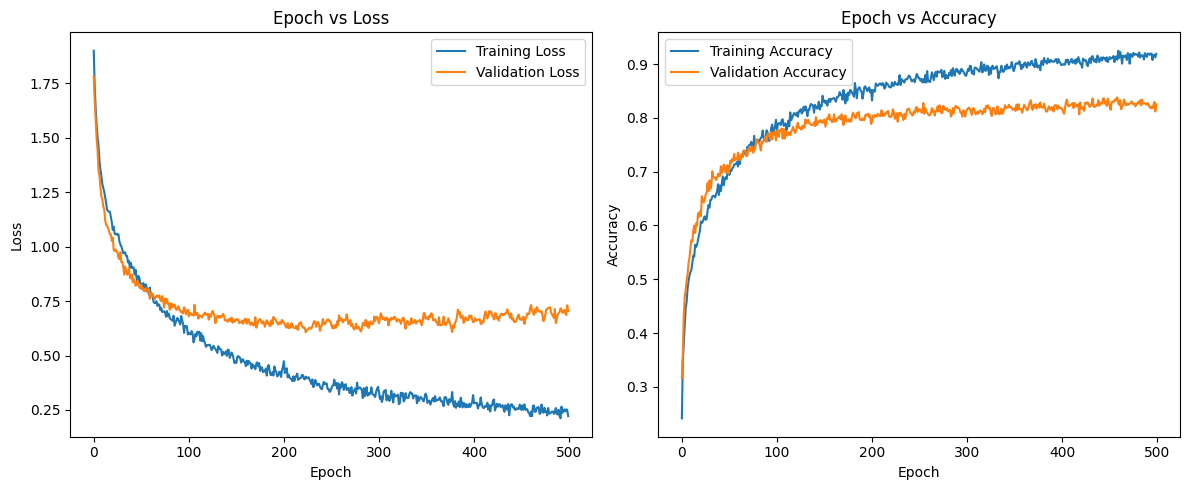

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print(f"Training Accuracy: {train_accuracy * 100:.2f}%")

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Training Accuracy: 98.66%
Test Accuracy: 81.66%


6/6 [==============================] - 0s 1ms/step


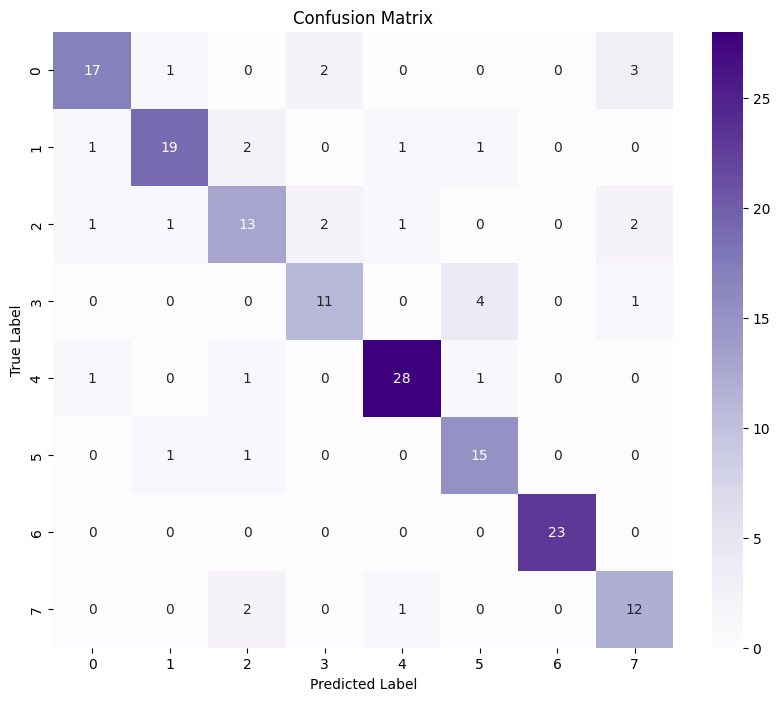

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.86      0.79      0.83        24
           2       0.68      0.65      0.67        20
           3       0.73      0.69      0.71        16
           4       0.90      0.90      0.90        31
           5       0.71      0.88      0.79        17
           6       1.00      1.00      1.00        23
           7       0.67      0.80      0.73        15

    accuracy                           0.82       169
   macro avg       0.80      0.81      0.80       169
weighted avg       0.82      0.82      0.82       169



In [18]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

if len(y_test.shape) == 1 or y_test.shape[1] == 1:
    y_true = y_test  
else:
    y_true = np.argmax(y_test, axis=1)  


conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

class_report = classification_report(y_true, y_pred_classes, target_names=[str(i) for i in range(len(np.unique(y_true)))])
print("Classification Report:")
print(class_report)
